In [55]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install pandas

In [56]:
import math
import numpy as np
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot as plt
from scipy.optimize import minimize_scalar
from matplotlib import pyplot
import pandas as pd

In [45]:
f = np.asarray([1,10,100,1000])

def objective(args): # Extend any function with extend to n variables 
    argsquare = np.multiply(args,args)
    return np.dot(argsquare, f)
    
# derivative of objective function
def derivative(args):
    return np.multiply(2*f, args)

# steepest descent algo.
def steepestexact(epsilon):
    # track all solutions
    solutions = list()
    # generate an initial point
    solution = np.ones(len(f))
    
    # run the gradient descent
    solution_eval = objective(solution)
    errors = []
    norm = []
    
    while solution_eval >= epsilon:
        #calculate gradient
        gradient = derivative(solution)
        res = minimize_scalar(lambda alpha: objective([solution[i] - alpha * gradient[i] for i in range(len(solution))]))
        alpha = res.x
        solution = solution - gradient*alpha
        solutions.append(solution)
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        errors.append(solution_eval)
        solutionlength = np.linalg.norm(solution)
        norm.append(solutionlength)
    return solutions, errors, norm

In [46]:
epsilon = 10**(-5)
solutionsexact = steepestexact(epsilon)

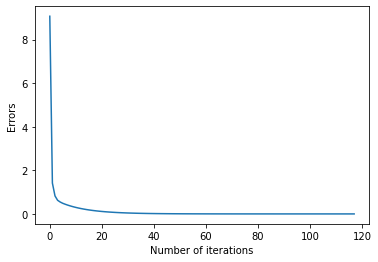

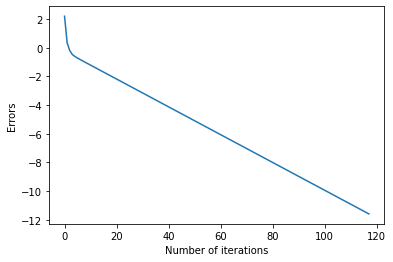

In [34]:
def plot_errors_vs_num_iterations(errors):
    plt.plot(errors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
def plot_lnerrors_vs_num_iterations(errors):
    logerrors = np.log10(errors)
    plt.plot(logerrors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
    
plot_errors_vs_num_iterations(solutionsexact[1])
plot_lnerrors_vs_num_iterations(solutionsexact[1])

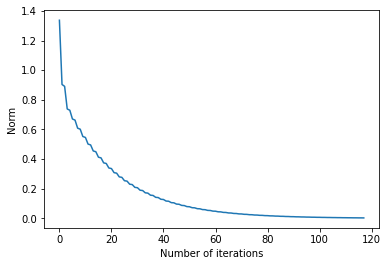

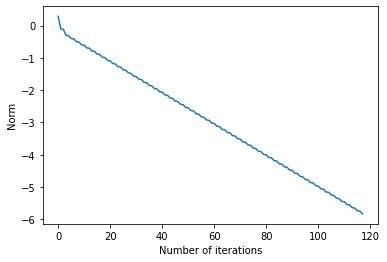

In [35]:
def plot_norm_vs_num_iterations(norm):
    plt.plot(norm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnnorm_vs_num_iterations(norm):
    lognorm = np.log10(norm)
    plt.plot(lognorm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

plot_norm_vs_num_iterations(solutionsexact[2])
plot_lnnorm_vs_num_iterations(solutionsexact[2])

In [36]:
f = np.asarray([1,10])

def objective(args): # Extend any function with extend to n variables 
    argsquare = np.multiply(args,args)
    return np.dot(argsquare, f)
    
# derivative of objective function
def derivative(args):
    return np.multiply(2*f, args)

# steepest descent algo.
def steepestbA(epsilon, tau, beta):
    # track all solutions
    solutions = list()
    # generate an initial point
    solution = np.ones(len(f))
    # run the gradient descent
    solution_eval = objective(solution)
    
    errors = []
    norm = []
    
    while solution_eval >= epsilon:
        alpha = 1
        #calculate gradient
        gradient = derivative(solution)
        newsolution = solution - alpha*gradient
        a = beta * alpha * np.dot(gradient, gradient)
        k = objective(solution) - a
        
        while objective(newsolution) > k:
            alpha = tau*alpha
            newsolution = solution - alpha*gradient
            a = beta * alpha * np.dot(gradient, gradient)
            k = objective(solution) - a
            
            
        solution = solution - alpha*gradient
        solutions.append(solution)
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        errors.append(solution_eval)
        solutionlength = np.linalg.norm(solution)
        norm.append(solutionlength)
    return solutions, errors, norm

In [37]:
epsilon = 10**(-5)
tau = 0.5
beta = 0.01
solutionsbA = steepestbA(epsilon, tau, beta)

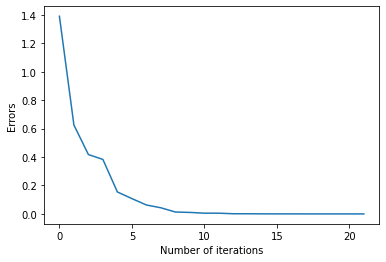

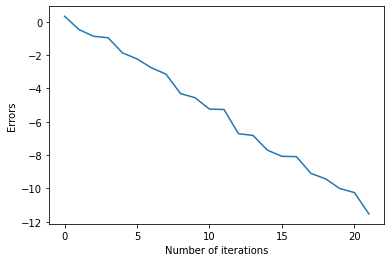

In [38]:
def plot_errors_vs_num_iterations(errors):
    plt.plot(errors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
def plot_lnerrors_vs_num_iterations(errors):
    logerrors = np.log10(errors)
    plt.plot(logerrors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
    
plot_errors_vs_num_iterations(solutionsbA[1])
plot_lnerrors_vs_num_iterations(solutionsbA[1])

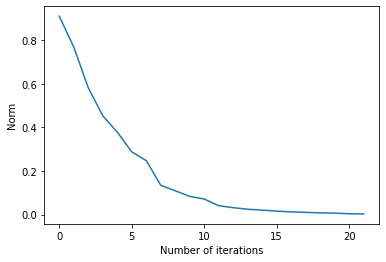

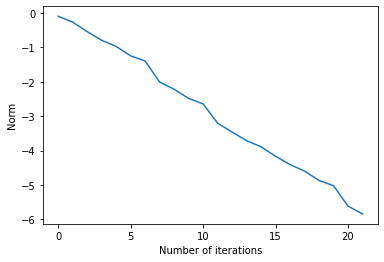

In [39]:
def plot_norm_vs_num_iterations(norm):
    plt.plot(norm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnnorm_vs_num_iterations(norm):
    lognorm = np.log10(norm)
    plt.plot(lognorm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

plot_norm_vs_num_iterations(solutionsbA[2])
plot_lnnorm_vs_num_iterations(solutionsbA[2])

In [27]:
def get_n_dimensional_array(dimensions, n):
    return np.asarray([n ** i for i in range(dimensions)])

In [44]:
f = get_n_dimensional_array(8, 2)

def objective(args): # Extend any function with extend to n variables 
    argsquare = np.multiply(args,args)
    return np.dot(argsquare, f)
    
# derivative of objective function
def derivative(args):
    return np.multiply(2*f, args)

# steepest descent algo.
def steepestfix(epsilon, weight):
    # track all solutions
    solutions = list()
    # generate an initial point
    solution = np.ones(len(f))
    
    # run the gradient descent
    solution_eval = objective(solution)
    
    errors = []
    norm = []
    
    while solution_eval >= epsilon:
        #calculate gradient
        gradient = derivative(solution)
        solution = solution - gradient*weight
        solutions.append(solution)
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        print(solution, solution_eval)
        errors.append(solution_eval)
        solutionlength = np.linalg.norm(solution)
        norm.append(solutionlength)
    return solutions, errors, norm

In [45]:
weight = 1/2000
epsilon = 0.01
solutionsfix = steepestfix(epsilon, weight)

[0.999 0.998 0.996 0.992 0.984 0.968 0.936 0.872] 213.70674499999998
[0.998001 0.996004 0.992016 0.984064 0.968256 0.937024 0.876096 0.760384] 180.890613505025
[0.997003   0.99401199 0.98804794 0.97619149 0.9527639  0.90703923
 0.82002586 0.66305485] 154.6603339373661
[0.996006   0.99202397 0.98409574 0.96838196 0.93751968 0.87801398
 0.7675442  0.57818383] 133.56220087813676
[0.99500999 0.99003992 0.98015936 0.9606349  0.92251937 0.84991753
 0.71842137 0.5041763 ] 116.47706503772181
[0.99401498 0.98805984 0.97623872 0.95294982 0.90775906 0.82272017
 0.6724424  0.43964173] 102.5417841049526
[0.99302097 0.98608372 0.97233377 0.94532622 0.89323491 0.79639312
 0.62940609 0.38336759] 91.08930040915256
[0.99202794 0.98411155 0.96844443 0.93776361 0.87894315 0.77090854
 0.5891241  0.33429654] 81.60290592227321
[0.99103592 0.98214333 0.96457066 0.9302615  0.86488006 0.74623947
 0.55142016 0.29150658] 73.68131596738093
[0.99004488 0.98017904 0.96071237 0.92281941 0.85104198 0.72235981
 0.51612

 1.87668925e-04 3.05977920e-08 5.23300957e-16 2.26344520e-32] 0.6403209905333059
[5.86685324e-01 3.44015893e-01 1.18093877e-01 1.38267865e-02
 1.84666222e-04 2.96186627e-08 4.89809695e-16 1.97372421e-32] 0.6382081788193507
[5.86098639e-01 3.43327861e-01 1.17621501e-01 1.37161722e-02
 1.81711562e-04 2.86708655e-08 4.58461875e-16 1.72108751e-32] 0.6361045198166695
[5.85512540e-01 3.42641205e-01 1.17151015e-01 1.36064429e-02
 1.78804177e-04 2.77533978e-08 4.29120315e-16 1.50078831e-32] 0.6340099606794992
[5.84927028e-01 3.41955923e-01 1.16682411e-01 1.34975913e-02
 1.75943310e-04 2.68652890e-08 4.01656615e-16 1.30868741e-32] 0.6319244489574817
[5.84342100e-01 3.41272011e-01 1.16215682e-01 1.33896106e-02
 1.73128218e-04 2.60055998e-08 3.75950591e-16 1.14117542e-32] 0.6298479325919715
[5.83757758e-01 3.40589467e-01 1.15750819e-01 1.32824937e-02
 1.70358166e-04 2.51734206e-08 3.51889754e-16 9.95104966e-33] 0.6277803599123849
[5.83174001e-01 3.39908288e-01 1.15287816e-01 1.31762338e-02
 1.676

[4.07200617e-01 1.65663211e-01 2.73455023e-02 7.37023939e-04
 5.12387341e-07 2.07047916e-13 1.60587659e-26 3.83533646e-54] 0.22369639300407151
[4.06793416e-01 1.65331885e-01 2.72361202e-02 7.31127748e-04
 5.04189143e-07 2.00422382e-13 1.50310049e-26 3.34441340e-54] 0.22312164904726736
[4.06386623e-01 1.65001221e-01 2.71271758e-02 7.25278726e-04
 4.96122117e-07 1.94008866e-13 1.40690206e-26 2.91632848e-54] 0.22254863590820867
[4.05980236e-01 1.64671219e-01 2.70186671e-02 7.19476496e-04
 4.88184163e-07 1.87800582e-13 1.31686032e-26 2.54303844e-54] 0.2219773472201803
[4.05574256e-01 1.64341876e-01 2.69105924e-02 7.13720684e-04
 4.80373217e-07 1.81790964e-13 1.23258126e-26 2.21752952e-54] 0.22140777664554404
[4.05168681e-01 1.64013193e-01 2.68029500e-02 7.08010919e-04
 4.72687245e-07 1.75973653e-13 1.15369606e-26 1.93368574e-54] 0.2208399178755762
[4.04763513e-01 1.63685166e-01 2.66957382e-02 7.02346831e-04
 4.65124249e-07 1.70342496e-13 1.07985951e-26 1.68617396e-54] 0.22027376463030587
[

 1.63739141e-10 1.85299463e-20 7.45350740e-41 7.97130545e-84] 0.0685885904177045
[2.46917880e-01 6.08830947e-02 3.68599818e-03 1.32836576e-05
 1.61119315e-10 1.79369880e-20 6.97648293e-41 6.95097835e-84] 0.06843628976330814
[2.46670962e-01 6.07613285e-02 3.67125419e-03 1.31773883e-05
 1.58541406e-10 1.73630044e-20 6.52998802e-41 6.06125312e-84] 0.06828435557322679
[2.46424291e-01 6.06398059e-02 3.65656917e-03 1.30719692e-05
 1.56004744e-10 1.68073882e-20 6.11206879e-41 5.28541272e-84] 0.06813278685664148
[2.46177867e-01 6.05185263e-02 3.64194289e-03 1.29673934e-05
 1.53508668e-10 1.62695518e-20 5.72089639e-41 4.60887989e-84] 0.06798158262582939
[2.45931689e-01 6.03974892e-02 3.62737512e-03 1.28636543e-05
 1.51052529e-10 1.57489261e-20 5.35475902e-41 4.01894327e-84] 0.06783074189615237
[2.45685758e-01 6.02766942e-02 3.61286562e-03 1.27607451e-05
 1.48635688e-10 1.52449605e-20 5.01205444e-41 3.50451853e-84] 0.06768026368604577
[2.45440072e-01 6.01561408e-02 3.59841416e-03 1.26586591e-05


 5.14874904e-014 1.60528746e-027 3.23806123e-055 1.44468085e-113] 0.02346903306604934
[1.49725804e-001 2.23752225e-002 4.96848895e-004 2.39416319e-007
 5.06636906e-014 1.55391826e-027 3.03082531e-055 1.25976170e-113] 0.023420104890695504
[1.49576078e-001 2.23304721e-002 4.94861499e-004 2.37500988e-007
 4.98530715e-014 1.50419288e-027 2.83685249e-055 1.09851221e-113] 0.023371282592780956
[1.49426502e-001 2.22858112e-002 4.92882053e-004 2.35600980e-007
 4.90554224e-014 1.45605871e-027 2.65529393e-055 9.57902644e-114] 0.023322565928219213
[1.49277075e-001 2.22412395e-002 4.90910525e-004 2.33716172e-007
 4.82705356e-014 1.40946483e-027 2.48535512e-055 8.35291105e-114] 0.023273954653542882
[1.49127798e-001 2.21967570e-002 4.88946883e-004 2.31846443e-007
 4.74982071e-014 1.36436195e-027 2.32629239e-055 7.28373844e-114] 0.02322544852590182
[1.48978670e-001 2.21523635e-002 4.86991095e-004 2.29991671e-007
 4.67382357e-014 1.32070237e-027 2.17740968e-055 6.35141992e-114] 0.023177047303061454
[1.

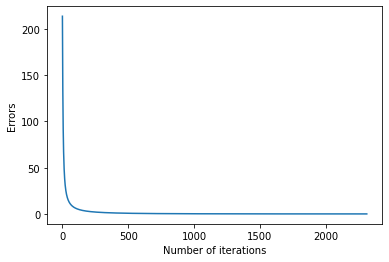

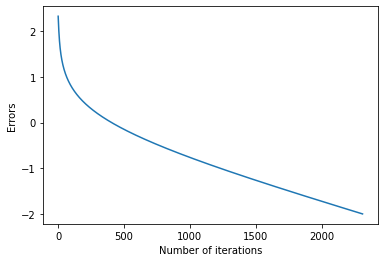

In [46]:
def plot_errors_vs_num_iterations(errors):
    plt.plot(errors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnerrors_vs_num_iterations(errors):
    logerrors = np.log10(errors)
    plt.plot(logerrors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
    
plot_errors_vs_num_iterations(solutionsfix[1])
plot_lnerrors_vs_num_iterations(solutionsfix[1])

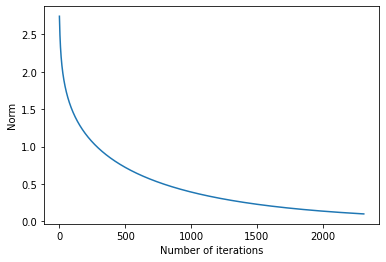

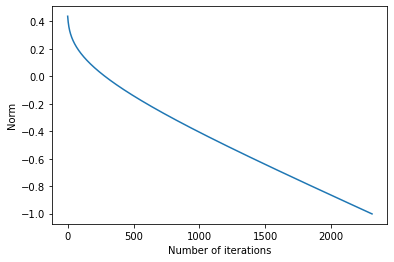

In [47]:
def plot_norm_vs_num_iterations(norm):
    plt.plot(norm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnnorm_vs_num_iterations(norm):
    lognorm = np.log10(norm)
    plt.plot(lognorm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

plot_norm_vs_num_iterations(solutionsfix[2])
plot_lnnorm_vs_num_iterations(solutionsfix[2])

# Comparing Nesterov with Steepest Gradient

In [48]:
# -------- Can delete if same as for steepestfix ------------#
f = get_n_dimensional_array(8, 2)

def objective(args): # Extend any function with extend to n variables 
    argsquare = np.multiply(args,args)
    return np.dot(argsquare, f)
    
# derivative of objective function
def derivative(args):
    return np.multiply(2*f, args)
# ------------------------------ #

def nesterov(epsilon):
    # track all solutions
    solutions = list()
    # generate an initial point
    x = np.ones(len(f))
    solutions.append(x)
    
    errors = []
    norm = []
    L = 2*np.max(f)
    mu = 2*np.min(f)
    k = mu/L
    # list of changes made to each variable
    y = x
    # run the gradient descent
    solution_eval = objective(x)
    while solution_eval >= epsilon:
        # calculate x (k+1), y (k+1)
        ygrad = derivative(y)
        x2 = y - (1/L)* ygrad
        y2 = x2 + (1 - np.sqrt(k))/(1 + np.sqrt(k))*(x2-x)
        x = x2
        y = y2  
        solution_eval = objective(x)
        solutions.append(x)
        # report progress
        print(x, solution_eval)
        errors.append(solution_eval)
        solutionlength = np.linalg.norm(x)
        norm.append(solutionlength)
    return solutions, errors, norm
 


In [49]:
epsilon = 0.01
solutions_nesterov = nesterov(epsilon)

[0.9921875 0.984375  0.96875   0.9375    0.875     0.75      0.5
 0.       ] 59.95758056640625
[0.97794357 0.95611145 0.91312016 0.82982933 0.67401475 0.40545386
 0.04060515 0.        ] 24.263586033824794
[ 0.95846617  0.91786913  0.83944681  0.69341869  0.44246445  0.08765184
 -0.17208725  0.        ] 14.542489581511543
[ 0.93479173  0.87199693  0.75343518  0.5429662   0.21745735 -0.13389944
 -0.17511701  0.        ] 10.31670456137261
[ 0.90781437  0.82055071  0.66010006  0.3908909   0.02537153 -0.23959967
 -0.08882734  0.        ] 7.488362205503658
[ 0.87830291  0.76531259  0.56373934  0.24704602 -0.11857614 -0.246099
 -0.00827644  0.        ] 5.8697046472086845
[ 0.8469161   0.70781119  0.46793492  0.11865424 -0.20925078 -0.18865703
  0.02959566  0.        ] 4.603302475294346
[ 0.81421599  0.64934218  0.37557576  0.01042118 -0.24954824 -0.10540862
  0.03065828  0.        ] 3.483431565003531
[ 0.78067998  0.59098896  0.28889833 -0.07521806 -0.24788799 -0.02676109
  0.01577415  0.    

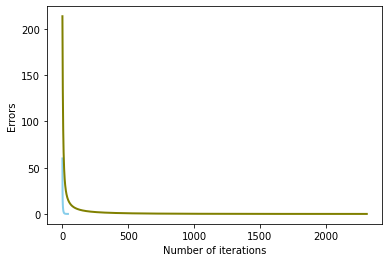

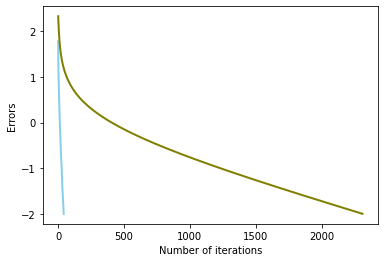

In [72]:
def plot_errors_vs_num_iterations(nesterov_errors, steepest_errors):
    plt.plot(range(len(nesterov_errors)), nesterov_errors, marker='', markerfacecolor='blue', color='skyblue', linewidth=2)
    plt.plot(range(len(steepest_errors)), steepest_errors, marker='', color='olive', linewidth=2)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnerrors_vs_num_iterations(nesterov_errors, steepest_errors):
    plt.plot(range(len(nesterov_errors)), np.log10(nesterov_errors), marker='', markerfacecolor='blue', color='skyblue', linewidth=2)
    plt.plot(range(len(steepest_errors)), np.log10(steepest_errors), marker='', color='olive', linewidth=2)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
    
plot_errors_vs_num_iterations(solutions_nesterov[1], solutionsfix[1])
plot_lnerrors_vs_num_iterations(solutions_nesterov[1], solutionsfix[1])

# Plot with upper bound function

In [77]:
upper_bound = map(example_func, range(10))
list(upper_bound)

[2.0, 1.99, 1.98, 1.97, 1.96, 1.95, 1.94, 1.93, 1.92, 1.91]

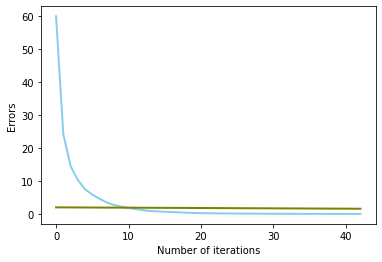

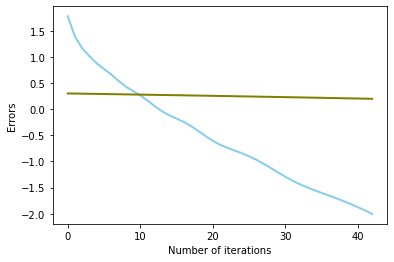

In [79]:
def plot_errors_vs_num_iterations(errors, upper_bound_func):
    iterations = range(len(errors))
    upper_bound = map(upper_bound_func, iterations)
    plt.plot(errors, marker='', markerfacecolor='blue', color='skyblue', linewidth=2)
    plt.plot(list(upper_bound), marker='', color='olive', linewidth=2)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnerrors_vs_num_iterations(errors, upper_bound_func):
    iterations = range(len(errors))
    upper_bound = map(upper_bound_func, iterations)
    plt.plot(np.log10(errors), marker='', markerfacecolor='blue', color='skyblue', linewidth=2)
    plt.plot(np.log10(list(upper_bound)), marker='', color='olive', linewidth=2)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()

def example_upper_bound_func(k):
    return 2 - 0.01 * k
plot_errors_vs_num_iterations(solutions_nesterov[1], example_upper_bound_func)
plot_lnerrors_vs_num_iterations(solutions_nesterov[1], example_upper_bound_func)

